In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies_data = pd.read_csv("./data/movies.csv")

In [3]:
movies_data.columns

Index(['_id', 'genres', 'image_url', 'imdb_id', 'imdb_link', 'movie_id',
       'movie_title', 'original_language', 'overview', 'popularity',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'tmdb_id', 'tmdb_link', 'vote_average', 'vote_count', 'year_released'],
      dtype='object')

In [4]:
movies_data.shape

(5000, 19)

In [5]:
movies_data["movie_id"].nunique()

5000

In [6]:
dataset = movies_data.drop_duplicates(subset='movie_id', keep='first')

In [7]:
dataset.shape

(5000, 19)

In [8]:
dataset.isna().sum()

_id                     0
genres                  0
image_url               0
imdb_id                 0
imdb_link               0
movie_id                0
movie_title             0
original_language       0
overview                0
popularity              0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
tmdb_id                 0
tmdb_link               0
vote_average            0
vote_count              0
year_released           0
dtype: int64

In [9]:
dataset["movie_id"].nunique()

5000

In [10]:
dataset.shape

(5000, 19)

In [11]:
dataset.isna().sum()

_id                     0
genres                  0
image_url               0
imdb_id                 0
imdb_link               0
movie_id                0
movie_title             0
original_language       0
overview                0
popularity              0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
tmdb_id                 0
tmdb_link               0
vote_average            0
vote_count              0
year_released           0
dtype: int64

In [12]:
dataset.head()

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,622c651ca936b956009a516e,"[""Action"",""Adventure"",""Comedy"",""Science Fiction""]",film-poster/6/2/0/6/6/5/620665-the-adam-projec...,tt2463208,http://www.imdb.com/title/tt2463208/maindetails,the-adam-project,The Adam Project,en,"After accidentally crash-landing in 2022, time...",6023.329,"[""United States of America""]",2022-03-11,106.0,"[""English""]",696806.0,https://www.themoviedb.org/movie/696806/,7.1,1018.0,2022.0
1,5fc86eed6758f696348d253c,"[""Science Fiction"",""Action"",""Adventure""]",film-poster/5/0/8/6/3/8/508638-venom-let-there...,tt7097896,http://www.imdb.com/title/tt7097896/maindetails,venom-let-there-be-carnage,Venom: Let There Be Carnage,en,After finding a host body in investigative rep...,4497.836,"[""China"",""United States of America""]",2021-09-30,97.0,"[""English""]",580489.0,https://www.themoviedb.org/movie/580489/,6.8,1847.0,2021.0
2,61938706dc71c3764e4b2542,"[""Action"",""Comedy"",""Crime"",""Thriller""]",film-poster/4/4/1/8/5/8/441858-red-notice-0-23...,tt7991608,http://www.imdb.com/title/tt7991608/maindetails,red-notice,Red Notice,en,An Interpol-issued Red Notice is a global aler...,4173.995,"[""United States of America""]",2021-11-04,117.0,"[""English"",""Italiano"",""Pусский""]",512195.0,https://www.themoviedb.org/movie/512195/,6.8,1950.0,2021.0
3,6088739e28f29d0115ea52e3,"[""Action"",""Adventure"",""Fantasy""]",film-poster/4/9/4/9/6/9/494969-shang-chi-and-t...,tt9376612,http://www.imdb.com/title/tt9376612/maindetails,shang-chi-and-the-legend-of-the-ten-rings,Shang-Chi and the Legend of the Ten Rings,en,Shang-Chi must confront the past he thought he...,3641.782,"[""United States of America""]",2021-09-01,132.0,"[""English"",""普通话""]",566525.0,https://www.themoviedb.org/movie/566525/,7.9,2201.0,2021.0
4,623952c2a936b9560082303e,"[""Action"",""Thriller""]",film-poster/7/4/0/0/5/1/740051-blacklight-0-23...,tt14060094,http://www.imdb.com/title/tt14060094/maindetails,blacklight,Blacklight,en,Travis Block is a shadowy Government agent who...,3641.050,"[""Australia"",""United States of America""]",2022-02-10,104.0,"[""English""]",823625.0,https://www.themoviedb.org/movie/823625/,5.7,175.0,2022.0


In [13]:
dataset.dtypes

_id                      object
genres                   object
image_url                object
imdb_id                  object
imdb_link                object
movie_id                 object
movie_title              object
original_language        object
overview                 object
popularity              float64
production_countries     object
release_date             object
runtime                 float64
spoken_languages         object
tmdb_id                 float64
tmdb_link                object
vote_average            float64
vote_count              float64
year_released           float64
dtype: object

In [14]:
def safe_literal_eval(x):
    try:
        return literal_eval(x)
    except (ValueError, SyntaxError):
        return []  # Return an empty list for malformed entries

dataset = dataset.dropna(subset=['genres']).copy()

In [15]:
def create_soup(x):
    movie_title = str(x["movie_title"]) if pd.notna(x["movie_title"]) else ""
    genres = ' '.join(str(genre) for genre in x["genres"]) if isinstance(x["genres"], list) else ""
    overview = str(x["overview"]) if pd.notna(x["overview"]) else ""
    
    return " " + movie_title + " " + genres + " " + overview

dataset["soup"] = dataset.apply(create_soup, axis=1)
print(dataset[["movie_title", "soup"]].head())

                                 movie_title  \
0                           The Adam Project   
1                Venom: Let There Be Carnage   
2                                 Red Notice   
3  Shang-Chi and the Legend of the Ten Rings   
4                                 Blacklight   

                                                soup  
0   The Adam Project  After accidentally crash-la...  
1   Venom: Let There Be Carnage  After finding a ...  
2   Red Notice  An Interpol-issued Red Notice is ...  
3   Shang-Chi and the Legend of the Ten Rings  Sh...  
4   Blacklight  Travis Block is a shadowy Governm...  


In [16]:
dataset.shape

(5000, 20)

In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(dataset["soup"])

In [18]:
cosine_sim = cosine_similarity(matrix, matrix)

In [19]:
def recommend_movies(title, cosine_sim=cosine_sim, df=dataset,n_top=10):
    idx = df.index[df['movie_title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:]
    movie_indices = [i[0] for i in sim_scores]
    recommendations = df.iloc[movie_indices][:n_top][['movie_title', 'overview']]
    recommendations['similarity'] = [score[1] for score in sim_scores][:n_top]  # Add similarity score
    return recommendations

In [20]:
recommended_movies = recommend_movies('Spider-Man')
recommended_movies.reset_index()
recommended_movies

,movie_title,overview,similarity
2224,The Amazing Spider-Man,When an extortionist threatens to force a mult...,0.464953
274,Spider-Man: Into the Spider-Verse,Miles Morales is juggling his life between bei...,0.449602
565,Spider-Man: Across the Spider-Verse,The continuing story of Miles Morales and the ...,0.445064
566,Spider-Man: Across the Spider-Verse,The continuing story of Miles Morales and the ...,0.445064
424,Spider-Man,When an extortionist threatens to force a mult...,0.432826
212,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,0.429731
332,Spider-Man: Across the Spider-Verse (Part One),Miles Morales returns for the next chapter of ...,0.426868
176,Spider-Man: Homecoming,Following the events of Captain America: Civil...,0.386963
3669,Spider-Man Lives: A Miles Morales Story,"In the wake of Peter Parker's death, will Mile...",0.379071
2251,Spider-Man 2: Making the Amazing,A comprehensive 12-part documentary on the mak...,0.371891


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def recommend_movies_with_related_heatmap(title, cosine_sim=cosine_sim, df=dataset, n_top=10):
    idx = df.index[df['movie_title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    unique_movies=set()
    updated_movie_scores=[]
    for score in sim_scores:
        curr_movie_title=df.iloc[score[0]]['movie_title']
        if curr_movie_title not in unique_movies and curr_movie_title!=title:
            updated_movie_scores.append(score)
            unique_movies.add(curr_movie_title)
    sim_scores = updated_movie_scores[:n_top]
    movie_indices = [i[0] for i in sim_scores]
    
    recommendations = df.iloc[movie_indices][['movie_title', 'overview']]
    recommendations['similarity'] = [score[1] for score in sim_scores]
    
    # top_sim_matrix = cosine_sim[movie_indices, :][:, movie_indices]

    similarity_df = pd.DataFrame({
        'Movie Title': recommendations['movie_title'],
        'Similarity': recommendations['similarity']
    })
    
    plt.figure(figsize=(10, 6))
    heatmap_data = similarity_df.set_index('Movie Title').T
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f"Cosine Similarity Heatmap for {title}")
    plt.show()
    return recommendations


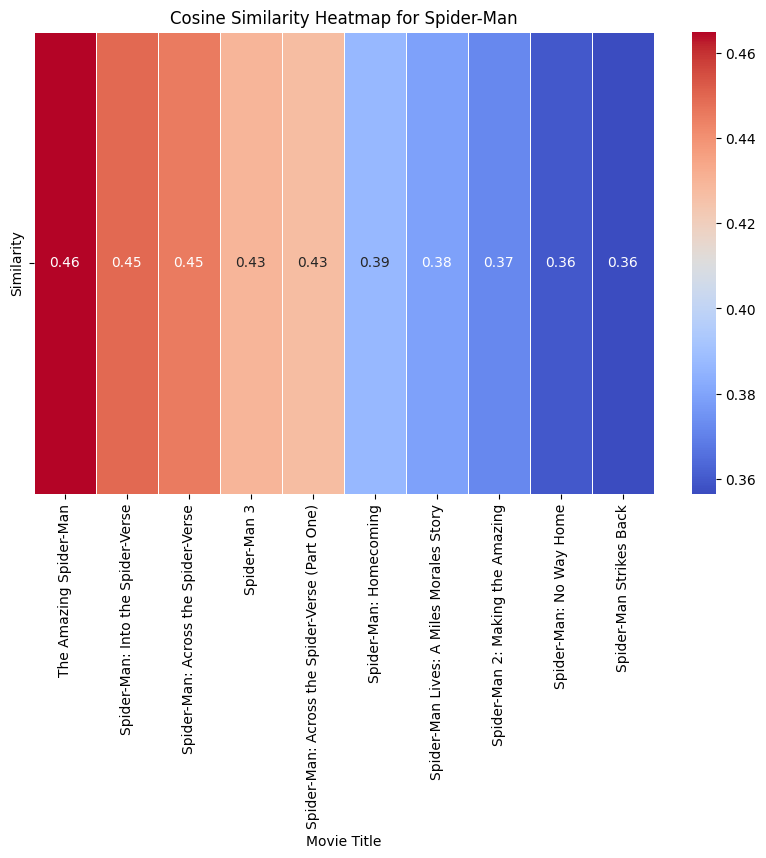

,movie_title,overview,similarity
2224,The Amazing Spider-Man,When an extortionist threatens to force a mult...,0.464953
274,Spider-Man: Into the Spider-Verse,Miles Morales is juggling his life between bei...,0.449602
565,Spider-Man: Across the Spider-Verse,The continuing story of Miles Morales and the ...,0.445064
212,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,0.429731
332,Spider-Man: Across the Spider-Verse (Part One),Miles Morales returns for the next chapter of ...,0.426868
176,Spider-Man: Homecoming,Following the events of Captain America: Civil...,0.386963
3669,Spider-Man Lives: A Miles Morales Story,"In the wake of Peter Parker's death, will Mile...",0.379071
2251,Spider-Man 2: Making the Amazing,A comprehensive 12-part documentary on the mak...,0.371891
76,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,0.359860
4542,Spider-Man Strikes Back,"At the New York State University, one of Peter...",0.356561


In [22]:
recommend_movies_with_related_heatmap('Spider-Man')

In [23]:
def recommend_movies_with_heatmap(title, cosine_sim=cosine_sim, df=dataset, n_top=10):
    idx = df.index[df['movie_title'] == title].tolist()[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    unique_movies=set()
    updated_movie_scores=[]
    for score in sim_scores:
        curr_movie_title=df.iloc[score[0]]['movie_title']
        if curr_movie_title not in unique_movies:
            updated_movie_scores.append(score)
            unique_movies.add(curr_movie_title)
    sim_scores = updated_movie_scores[:n_top]
    movie_indices = [i[0] for i in sim_scores]
    
    recommendations = df.iloc[movie_indices][['movie_title', 'overview']]
    recommendations['similarity'] = [score[1] for score in sim_scores]
    
    top_sim_matrix = cosine_sim[movie_indices, :][:, movie_indices]

    plt.figure(figsize=(12, 8))
    sns.heatmap(top_sim_matrix, annot=True, cmap='coolwarm', xticklabels=recommendations['movie_title'], 
                yticklabels=recommendations['movie_title'], fmt='.2f', linewidths=0.5)
    plt.title(f"Cosine Similarity Heatmap for Top {n_top} Movies Recommended for {title}")
    plt.show()
    
    return recommendations


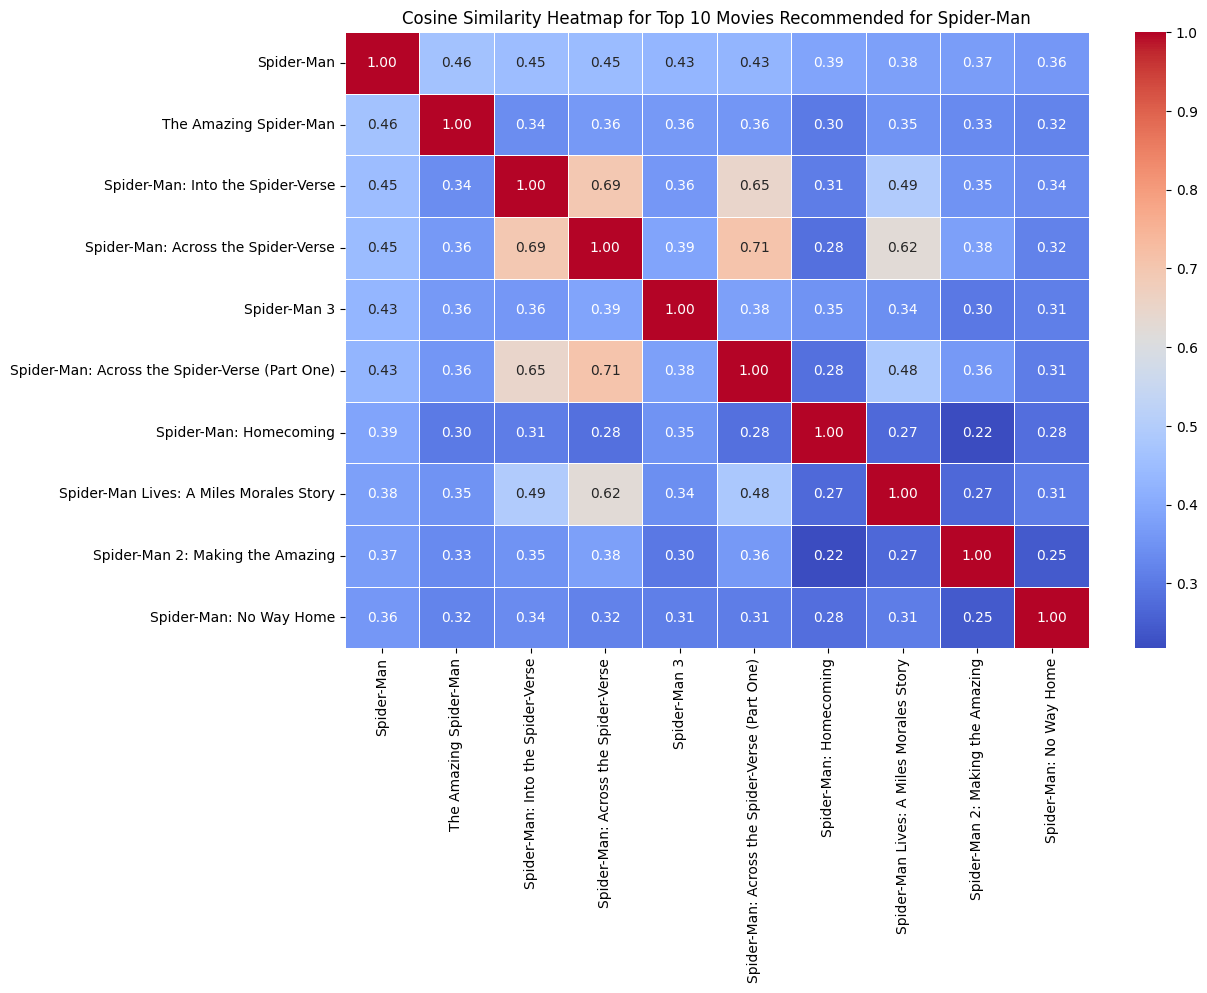

,movie_title,overview,similarity
209,Spider-Man,After being bitten by a genetically altered sp...,1.000000
2224,The Amazing Spider-Man,When an extortionist threatens to force a mult...,0.464953
274,Spider-Man: Into the Spider-Verse,Miles Morales is juggling his life between bei...,0.449602
565,Spider-Man: Across the Spider-Verse,The continuing story of Miles Morales and the ...,0.445064
212,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,0.429731
332,Spider-Man: Across the Spider-Verse (Part One),Miles Morales returns for the next chapter of ...,0.426868
176,Spider-Man: Homecoming,Following the events of Captain America: Civil...,0.386963
3669,Spider-Man Lives: A Miles Morales Story,"In the wake of Peter Parker's death, will Mile...",0.379071
2251,Spider-Man 2: Making the Amazing,A comprehensive 12-part documentary on the mak...,0.371891
76,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,0.359860


In [24]:
recommend_movies_with_heatmap('Spider-Man')